In [61]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [62]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file and rename columns
df = pl.read_csv("countries-in-conflict-data.csv").rename({
    "Entity": "country",
    "Code": "country_code",
    "Year": "year",
    "Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all": "total_deaths"
})

# Check the columns to verify renaming
print("Columns after renaming:", df.columns)

# Filter the DataFrame for years between 2012 and 2023
df_filtered = df.filter((pl.col("year") >= 2012) & (pl.col("year") <= 2023))

# Verify df_filtered columns
print("Columns after filtering:", df_filtered.columns)

# Create a new column for president based on the year using pl.when().then().otherwise()
df_filtered = df_filtered.with_columns(
    pl.when(pl.col("year").is_in([2012, 2013, 2014, 2015, 2016])).then("Barack Obama")
    .when(pl.col("year").is_in([2017, 2018, 2019, 2020])).then("Donald Trump")
    .when(pl.col("year").is_in([2021, 2022, 2023])).then("Joe Biden")
    .otherwise("Unknown").alias("president")
)

# Sum up total deaths under each president's administration
deaths_by_president = (
    df_filtered.groupby("president")
    .agg(pl.col("total_deaths").sum().alias("Total Deaths"))
    .sort("Total Deaths", reverse=True)
)

# Convert to pandas for plotting (Polars doesn't support plotting directly)
deaths_by_president = deaths_by_president.to_pandas()

# Set up the style for the plot
sns.set_theme(style="whitegrid")

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Total Deaths", y="president", data=deaths_by_president, palette="Reds_d")

# Titles and labels
plt.title("Total Deaths in Armed Conflicts by U.S. Administration (2012-2023)", fontsize=16, weight='bold')
plt.xlabel("Total Deaths", fontsize=12)
plt.ylabel("President", fontsize=12)

# Format x-axis with commas for better readability
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show plot
plt.tight_layout()
plt.show()


ColumnNotFoundError: Barack Obama

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'with_columns' <---
DF ["country", "country_code", "year", "total_deaths"]; PROJECT */4 COLUMNS; SELECTION: None

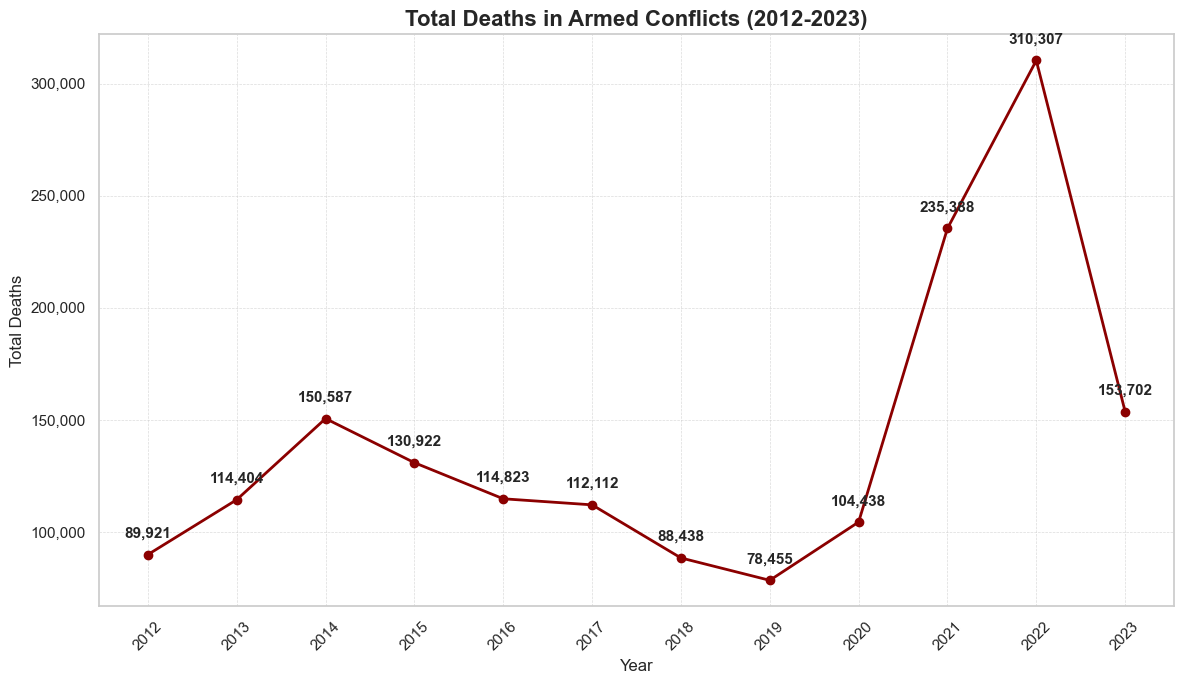

In [48]:
# Set up a nice style
sns.set_theme(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(deaths_per_year["year"], deaths_per_year["Total Deaths"], marker='o', linestyle='-', color='#8B0000', linewidth=2)  # Dark red color

# Adding data labels above the points, with bigger and bolder formatting
for x, y in zip(deaths_per_year["year"], deaths_per_year["Total Deaths"]):
    plt.text(x, y + max(deaths_per_year["Total Deaths"]) * 0.02, f"{y:,}", ha="center", va="bottom", fontsize=11, weight='bold')

# Titles and labels
plt.title("Total Deaths in Armed Conflicts (2012-2023)", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Improving the x-axis ticks
plt.xticks(deaths_per_year["year"], rotation=45)

# Adding a subtle grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Set up the style
sns.set_theme(style="whitegrid")

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Total Deaths", y="president", data=deaths_by_president, palette="Reds_d")

# Titles and labels
plt.title("Total Deaths in Armed Conflicts by U.S. Administration (2012-2023)", fontsize=16, weight='bold')
plt.xlabel("Total Deaths", fontsize=12)
plt.ylabel("President", fontsize=12)

# Format x-axis with commas for better readability
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show plot
plt.tight_layout()
plt.show()